## lead score case study assignment 
### Import libraries for analysis purpose.

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### importing and reading data for analysis purpose.

## 1. Data reading

In [8]:
lsd = pd.read_csv(r"C:\Users\windows 10\Downloads\Lead Scoring Assignment\Leads.csv")
lsd

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [9]:
lsd.shape

(9240, 37)

In [10]:
lsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
lsd.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### successfully data uploaded in python note book. and we found that data is having null values in several columns. next task is data cleaning.



## 2. Data cleaning 

In [12]:
## in several columns "select" value is appearing. which means persons have not selected any value and we will teat
## it as nll value 

#### treatment of "Select " value in colums

In [13]:
lsd = lsd.replace("Select" , np.nan)


In [14]:
lsd.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
## checking % wise missing value in data set
round(100*(lsd.isnull().sum()/len(lsd.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### drop all columns where missing values are above 35%. due to high percentage of missing values these columns will not 
#### be suitable for analysis

## 3. Dropping columns

In [16]:
lsd1 = lsd.drop(['Tags', 'Lead Quality', 'City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1)
lsd1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,NaN,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,NaN,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,Potential Lead,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,No,Potential Lead,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,No,Potential Lead,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,No,NaN,No,No,SMS Sent


In [17]:
# checking data after removal of columns with high values of null values 
lsd1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [18]:
# again checking percentage wise data of null values 
round(100*(lsd1.isnull().sum()/len(lsd1.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [19]:
# we have not dropped the column "Specializtion" despite of more than 35% values are null vakues. according to me this i important column and shoukd not be dropped
lsd1 = lsd1.drop(['Lead Profile' , 'How did you hear about X Education'] ,axis=1)
lsd1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,No,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,No,No,No,No,SMS Sent


In [20]:
## null values are filled with 'no data' to enable us working with data
lsd1['Specialization'] = lsd1['Specialization'].fillna('no data') 
lsd1['What matters most to you in choosing a course'] = lsd1['What matters most to you in choosing a course'].fillna('no data')
lsd1['Country'] = lsd1['Country'].fillna('no data')
lsd1['What is your current occupation'] = lsd1['What is your current occupation'].fillna('not provided')
lsd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
# again we will check the data with null values 
lsd1.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                            

In [22]:
# check percentae wise nill data in file
round(100*(lsd1.isnull().sum()/len(lsd1.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [23]:
# nul values items almost cleaned and we can go forward
# now we have only few columns left with null value we can remove these rows without lossing important data.

lsd1.dropna(inplace = True)

In [24]:
lsd1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,No,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,No,No,No,No,SMS Sent


In [25]:
# checking data after droping nul value rows from data
lsd1.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [26]:
prospect_id_counts = lsd1['Prospect ID'].value_counts()
print(prospect_id_counts)

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64


In [27]:
# all the values of the prospect ID are uniqe values and not helpful in our analysis so we are dropping the same 
lsd1 = lsd1.drop(['Prospect ID'], axis = 1)

In [48]:
# data cleaned for analysis purpose and no nul value rows or columns are pending now. 

In [28]:
# checking remaining values after cleaning data 
lsd1.shape


(9074, 27)

In [29]:
round(100*(lsd1.shape[0])/(lsd.shape[0]),2)

98.2

In [55]:
# more tahn 98.2 % rows are awailable after droping null rows.

## 4. Exploratry Data Analysis (EDA)

#### First we will do univariate analysis


##### 1. univariate Analysis of parameters  

In [30]:
# checking value counts of parameters identified for analysis after cleaning data.
value_counts = lsd1['Lead Number'].astype('category').value_counts()

print(value_counts)

579533    1
630088    1
630039    1
630041    1
630042    1
         ..
602403    1
602402    1
602392    1
602388    1
660737    1
Name: Lead Number, Length: 9074, dtype: int64


In [93]:
## These are all unique ID for customer wise so cannot be commented on this parameter. 
## we have not dropped this id as it is required for identification of customers 


In [31]:
# checking value counts of parameters identified for analysis after cleaning data.
value_counts = lsd1['Lead Origin'].astype('category').value_counts()

print(value_counts)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64


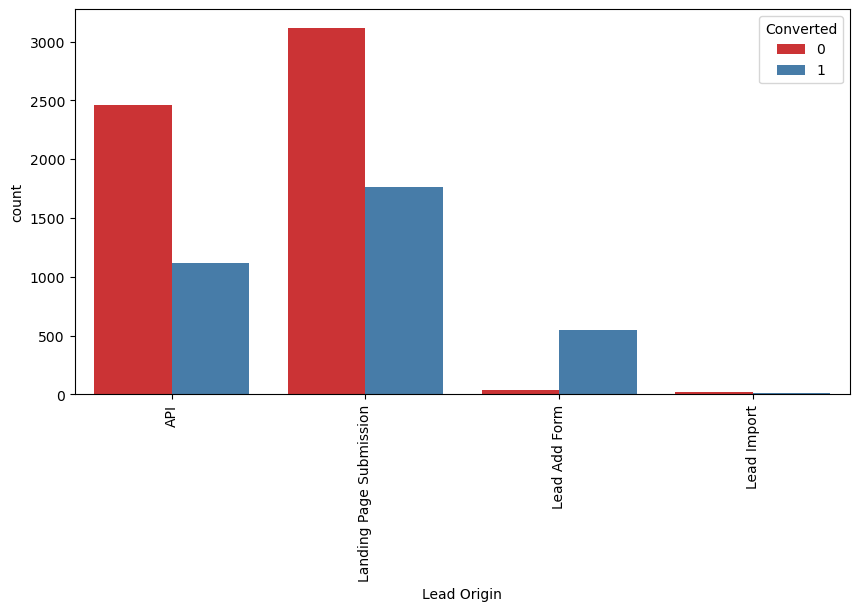

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x="Lead Origin", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [111]:
## lead conversion rate is low in API and Landing page submission. these parameters needs to be worked upon for
## increasing conversion rate. Lead Add form is doing extremely well 

In [33]:
value_counts = lsd1['Lead Source'].astype('category').value_counts()

print(value_counts)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64


In [34]:
# merging below 100 categories in new category named "others"

In [35]:
values_to_replace = ['Facebook', 'bing', 'google', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
                     'WeLearn', 'Pay per Click Ads', 'NC_EDM', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel']

# Replace the values in the "Lead Source" column with "others"
lsd1['Lead Source'] = lsd1['Lead Source'].replace(values_to_replace, 'others')

In [36]:
value_counts = lsd1['Lead Source'].astype('category').value_counts()

print(value_counts)

Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
others                59
Name: Lead Source, dtype: int64


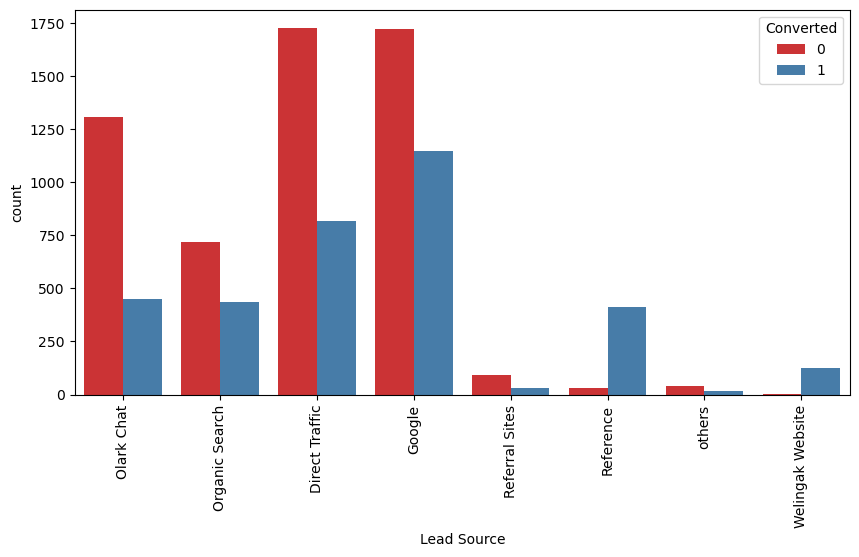

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x="Lead Source", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [38]:
# google and direct traffic is having good conversion rate and references and 
# welingak website is performing very well olak chat is low converson rate which needs to be worked upon

In [39]:
value_counts = lsd1['Do Not Email'].astype('category').value_counts()

print(value_counts)

No     8358
Yes     716
Name: Do Not Email, dtype: int64


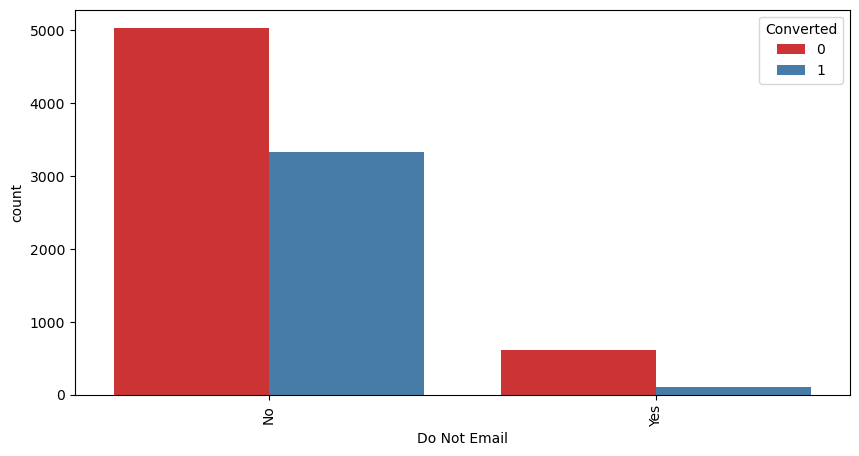

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x="Do Not Email", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [41]:
# above 90% entries are No, we cannot comment on this as no any insight available from this data

In [42]:
value_counts = lsd1['Do Not Call'].astype('category').value_counts()

print(value_counts)

No     9072
Yes       2
Name: Do Not Call, dtype: int64


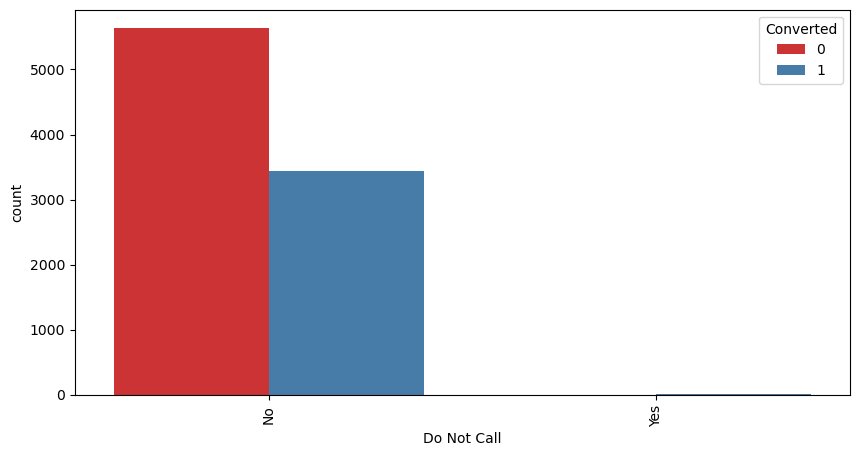

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x="Do Not Call", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [44]:
# all data is no,  we cannot comment on this as no any insight available from this data

In [45]:
value_counts = lsd1['Converted'].astype('category').value_counts()

print(value_counts)

0    5639
1    3435
Name: Converted, dtype: int64


In [46]:
round(100*(3435/(5639+3435)),2)

37.86

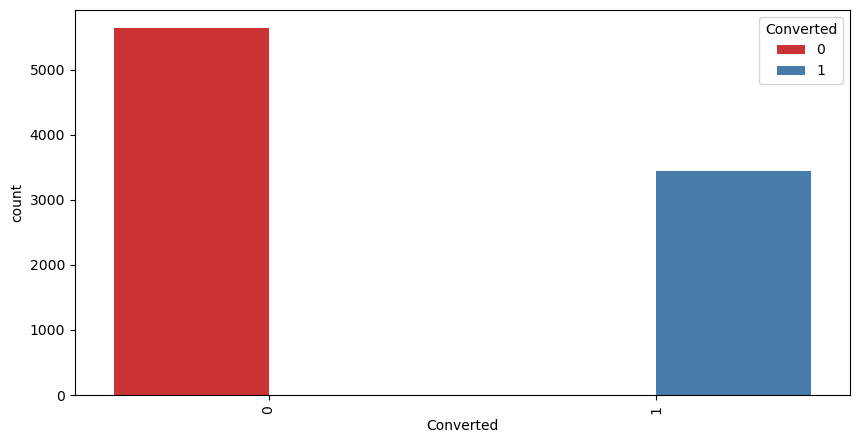

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x="Converted", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [48]:
# this is our target variable and 37.82% convertion rate showing in this parameter

In [49]:

value_counts = lsd1['TotalVisits'].astype('category').value_counts()

print(value_counts)

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
24.0        5
25.0        5
27.0        5
22.0        3
26.0        2
28.0        2
29.0        2
54.0        1
141.0       1
115.0       1
74.0        1
55.0        1
30.0        1
43.0        1
42.0        1
41.0        1
32.0        1
251.0       1
Name: TotalVisits, dtype: int64


<AxesSubplot:xlabel='TotalVisits'>

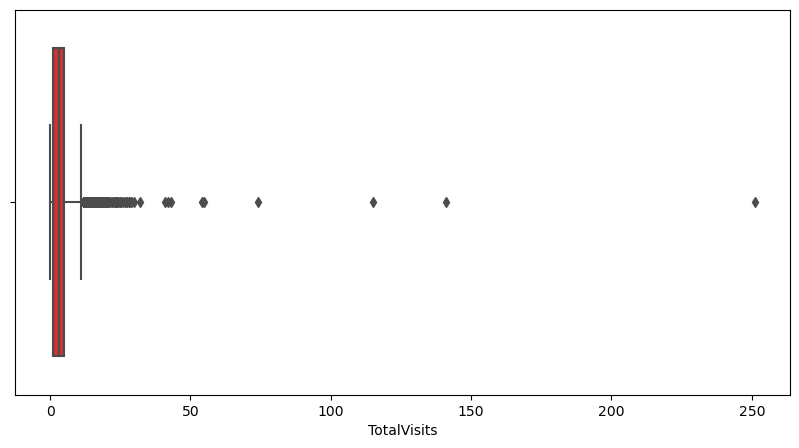

In [53]:
plt.figure(figsize=(10, 5))
sns.boxplot(lsd1['TotalVisits'],orient='vertical',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

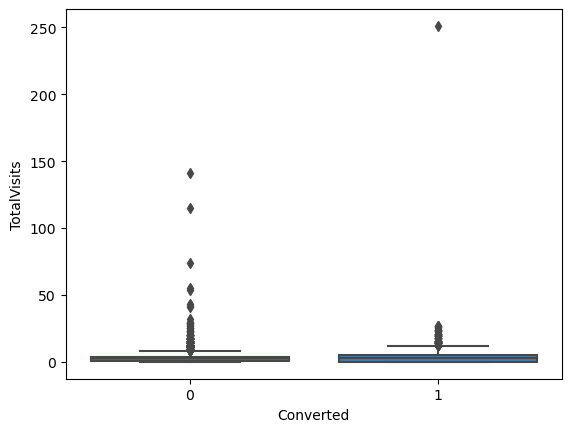

In [54]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lsd1,palette='Set1')

In [55]:
## data have many outliers due to which we have capped the data to 95 percentile.
percentiles = lsd1['TotalVisits'].quantile([0.05,0.95]).values
lsd1['TotalVisits'][lsd1['TotalVisits'] <= percentiles[0]] = percentiles[0]
lsd1['TotalVisits'][lsd1['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

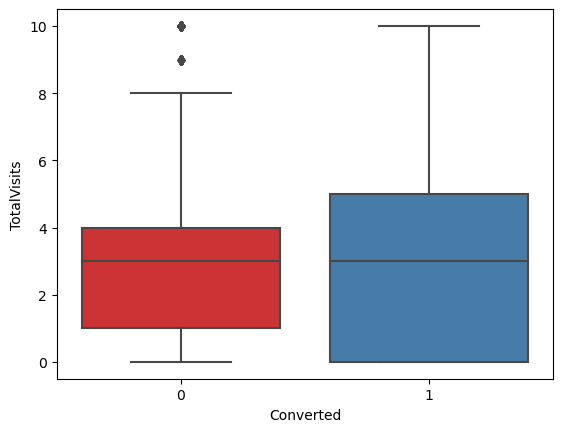

In [146]:
# after reducing the data to 95% again box plot prepared.
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lsd1,palette='Set1')

In [56]:
value_counts = lsd1['Total Time Spent on Website'].astype('category').value_counts()

print(value_counts)

0       2165
60        19
127       18
75        18
157       17
        ... 
1355       1
600        1
601        1
603        1
2272       1
Name: Total Time Spent on Website, Length: 1717, dtype: int64


<AxesSubplot:xlabel='Total Time Spent on Website'>

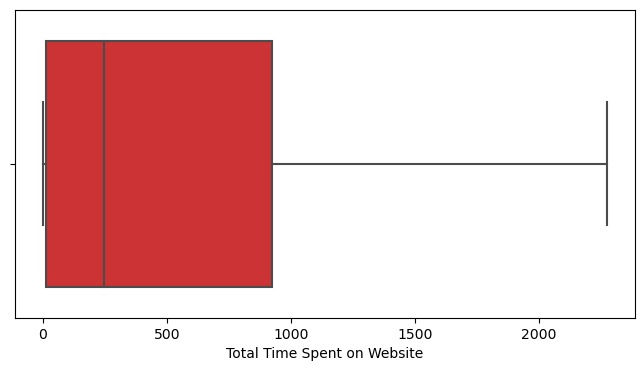

In [57]:
plt.figure(figsize=(8, 4))
sns.boxplot(lsd1['Total Time Spent on Website'],orient='horizontal',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

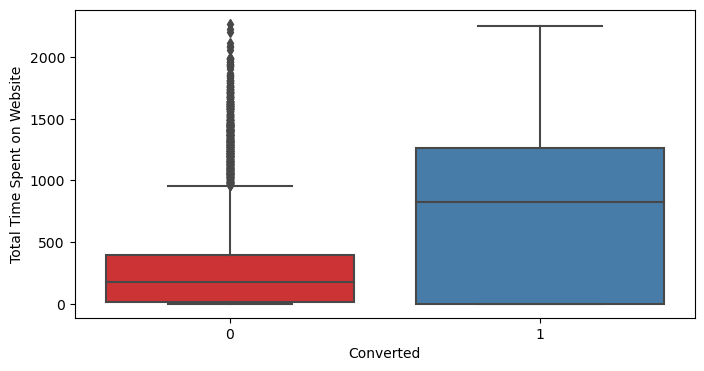

In [58]:
plt.figure(figsize=(8, 4))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lsd1,palette='Set1')

In [59]:
# it is clearly visualized that person spending more time on web site can be more probabily converted into positive lead 

In [60]:
value_counts = lsd1['Page Views Per Visit'].astype('category').value_counts()

print(value_counts)

0.0     2161
2.0     1794
3.0     1196
4.0      896
1.0      651
        ... 
3.57       1
3.8        1
3.82       1
3.83       1
55.0       1
Name: Page Views Per Visit, Length: 114, dtype: int64


<AxesSubplot:xlabel='Page Views Per Visit'>

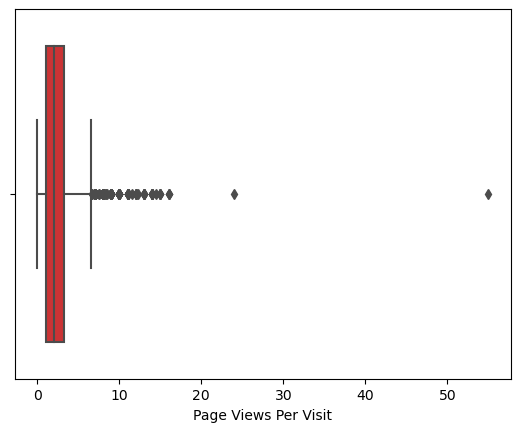

In [61]:
sns.boxplot(lsd1['Page Views Per Visit'],orient='vert',palette='Set1')

In [62]:
# here again we have many outliers and we will cap these outliers to 95 percentile 

In [63]:
percentiles = lsd1['Page Views Per Visit'].quantile([0.05,0.95]).values
lsd1['Page Views Per Visit'][lsd1['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lsd1['Page Views Per Visit'][lsd1['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

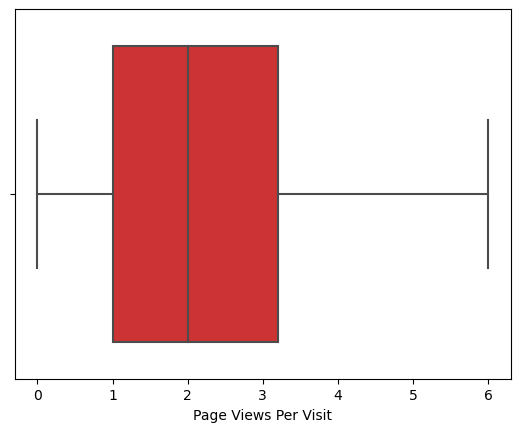

In [64]:
sns.boxplot(lsd1['Page Views Per Visit'],palette='Set1',orient='vert')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

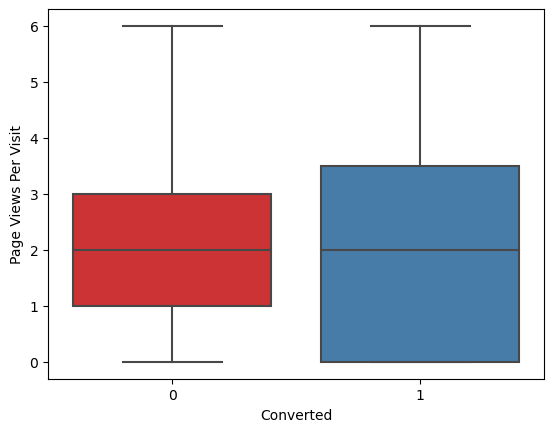

In [65]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lsd1,palette='Set1')

In [66]:
# mean for this box plot is same for converted leads and numbers of leads are also more as compared to non converted leads

In [67]:
value_counts = lsd1['Last Activity'].astype('category').value_counts()

print(value_counts)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


In [68]:
lsd1['Last Activity'] = lsd1['Last Activity'].replace(['Unreachable', 'Unsubscribed','Had a Phone Conversation', 'View in browser link Clicked','Approached upfront', 'Email Received', 'Email Marked Spam', 'Resubscribed to emails','Visited Booth in Tradeshow'], 'others')

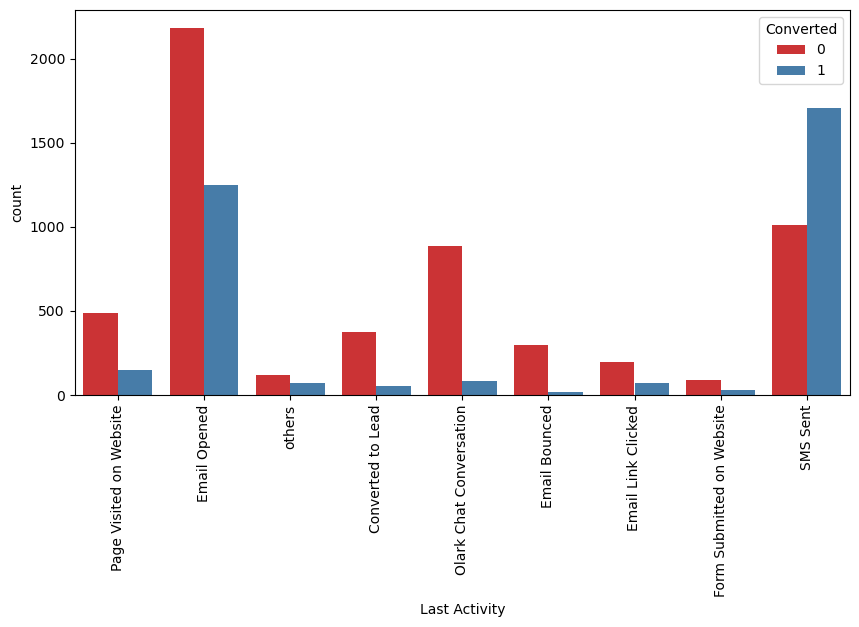

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x="Last Activity", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [70]:
# lead conversion activty is highest in sms sent parameter followed by Email opened where conversion rate is second highest

In [71]:
value_counts = lsd1['Country'].astype('category').value_counts()

print(value_counts)

India                   6491
no data                 2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
Sweden                     3
Philippines                2
Uganda                     2
Asia/Pacific Region        2
Italy                      2
Ghana                      2
China                      2
Belgium                    2
Bangladesh                 2
Netherlands                2
Malaysia                   1
Russia                     1
Liberia                    1
Kenya                      1
Sri Lanka                  1
Indonesia     

In [72]:
# less than 10 entries against countries clubbed in others parameter
lsd1['Country'] = lsd1['Country'].replace(['Hong Kong', 'Bahrain','Oman','France', 'unknown','South Africa','Kuwait','Germany',
                                           'Canada','Nigeria','Sweden','Philippines','Uganda', 'Asia/Pacific Region' , 'Italy' ,
                                           'Ghana' , 'China', 'Belgium', 'Bangladesh', 'Netherlands', 'Malaysia','Russia','Liberia',
                                           'Kenya','Sri Lanka','Indonesia', 'Switzerland','Tanzania', 'Denmark', 'Vietnam'],'others')

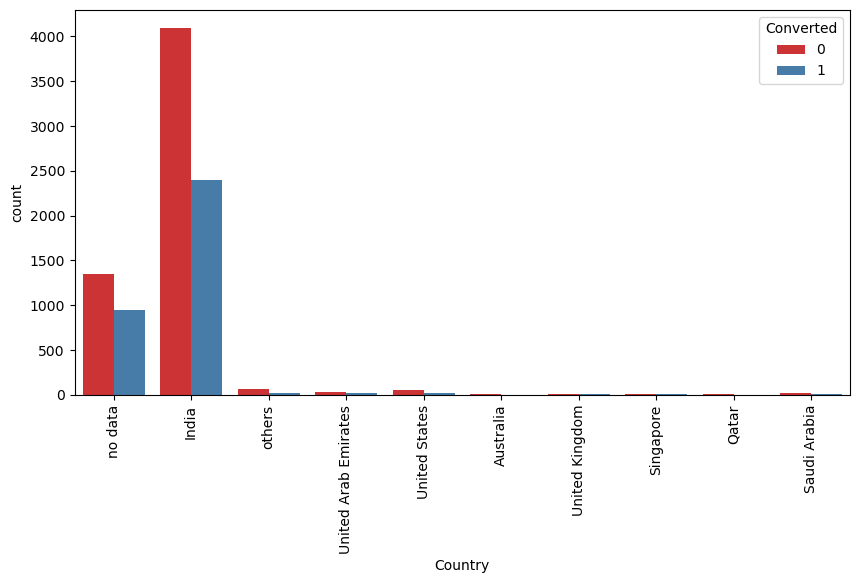

In [73]:
# after merging less than 10 leads countries merged in single 
plt.figure(figsize=(10,5))
sns.countplot(x="Country", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Most of the leads were sourced from country india and second largest was where data for country is not available 

In [74]:
value_counts = lsd1['Specialization'].astype('category').value_counts()

print(value_counts)

no data                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


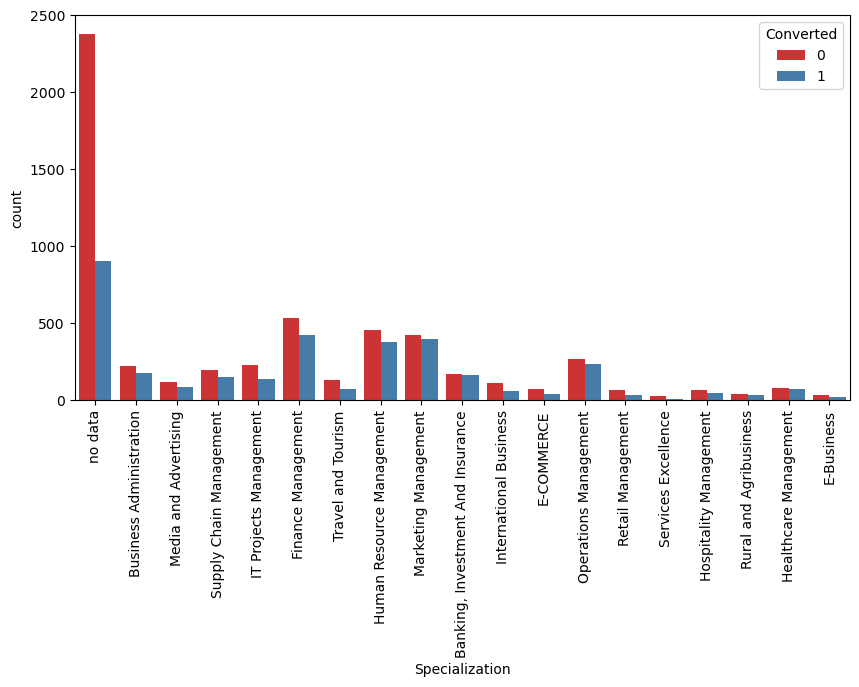

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x="Specialization", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# in this graph we can see that no data parameter is having highest leads convertion this may be due to students of 
# house wife who started new course so we are not removing this 

In [76]:
value_counts = lsd1['What is your current occupation'].astype('category').value_counts()

print(value_counts)

Unemployed              5476
not provided            2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


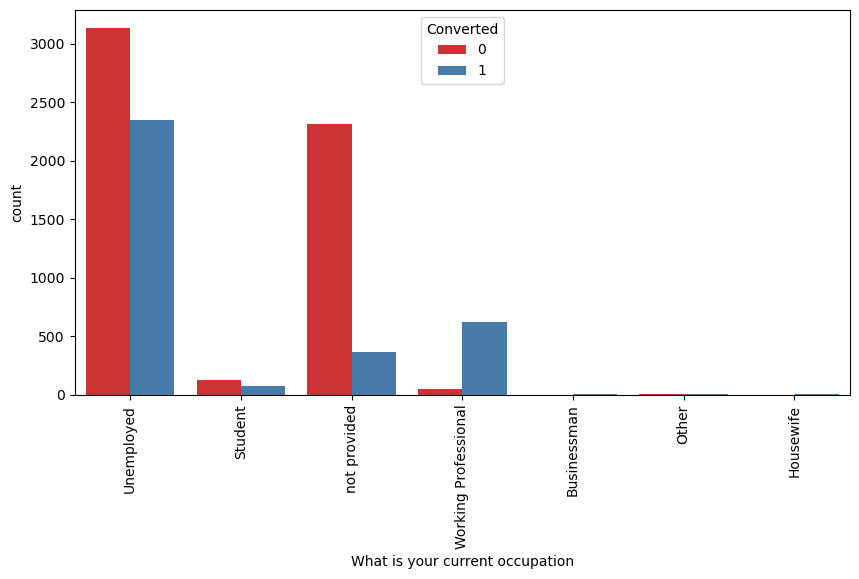

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(x="What is your current occupation", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# it is interpreated from above diagram that unemployed persons are opting for courses
# working professionals are also having high chances of conversion

In [78]:
value_counts = lsd1['What matters most to you in choosing a course'].astype('category').value_counts()

print(value_counts)

Better Career Prospects      6370
no data                      2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


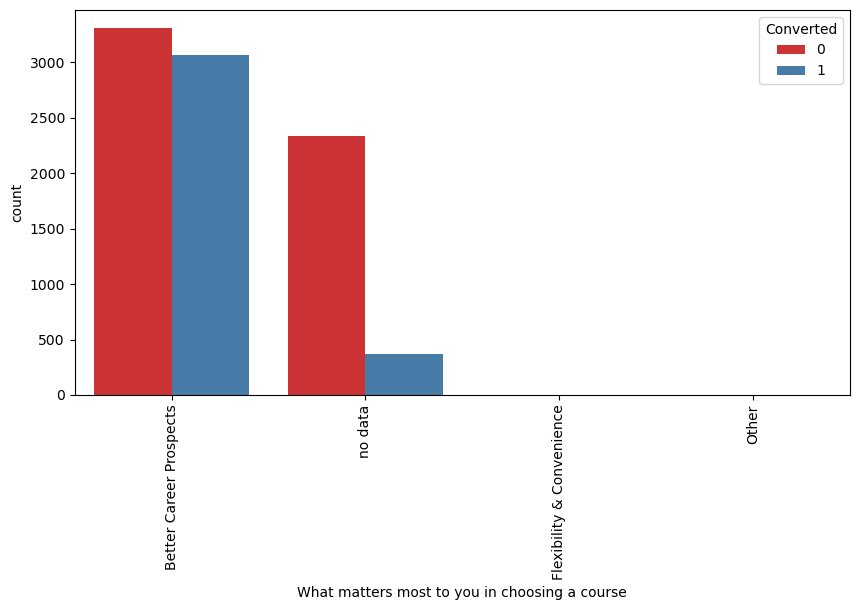

In [79]:
plt.figure(figsize=(10,5))
sns.countplot(x="What matters most to you in choosing a course", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# person looking for better carrier options usually opt for courses

In [80]:
value_counts = lsd1['Search'].astype('category').value_counts()

print(value_counts)

No     9060
Yes      14
Name: Search, dtype: int64


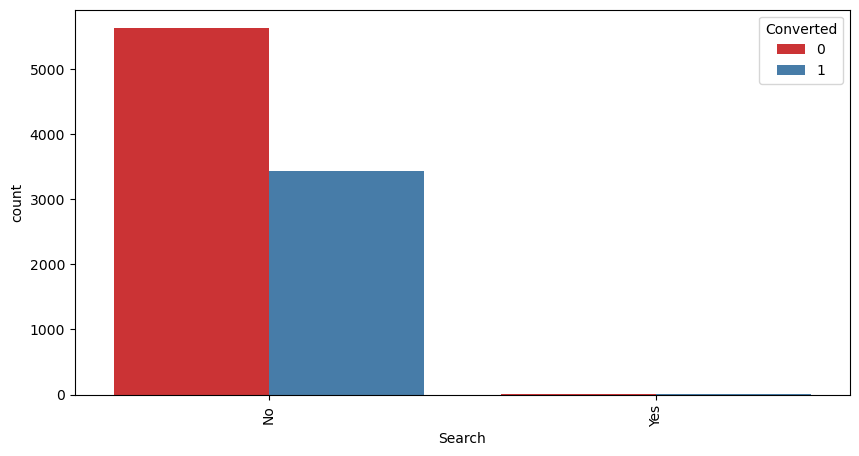

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(x="Search", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# this parameter has no significance as most parameters having no 

In [82]:
value_counts = lsd1['Magazine'].astype('category').value_counts()

print(value_counts)

No    9074
Name: Magazine, dtype: int64


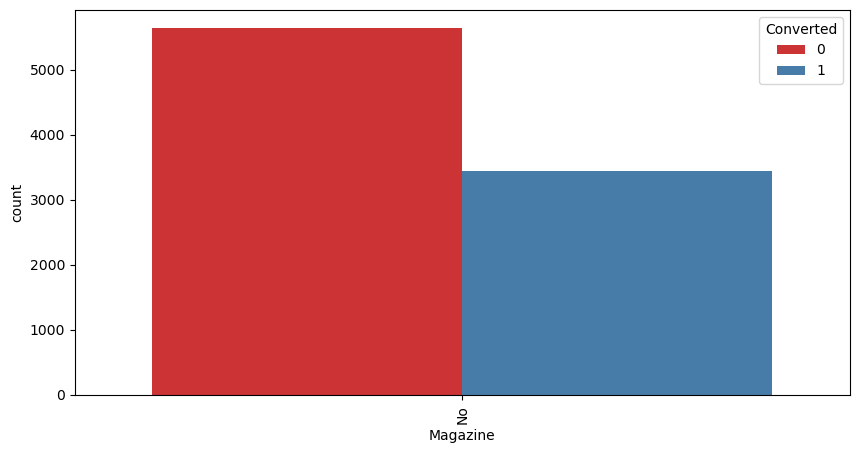

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(x="Magazine", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# this parameter has no significance as most parameters having no 

In [84]:
value_counts = lsd1['Newspaper Article'].astype('category').value_counts()

print(value_counts)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64


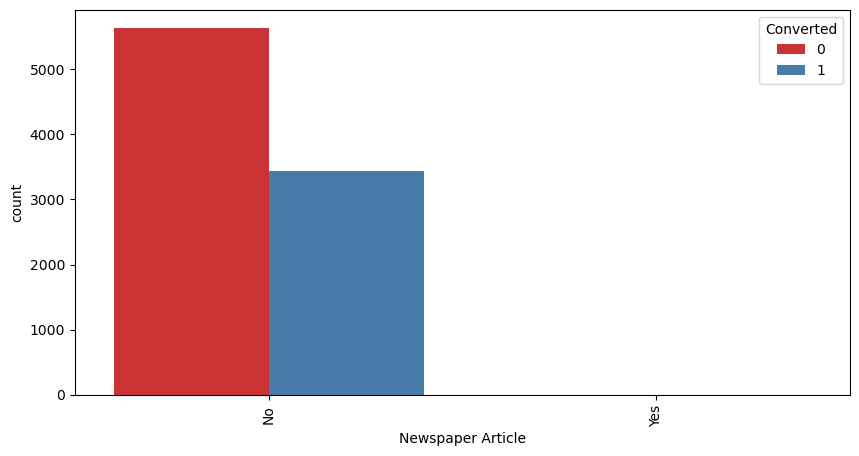

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(x="Newspaper Article", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# this parameter has no significance as most parameters having no 

In [86]:
value_counts = lsd1['X Education Forums'].astype('category').value_counts()

print(value_counts)

No     9073
Yes       1
Name: X Education Forums, dtype: int64


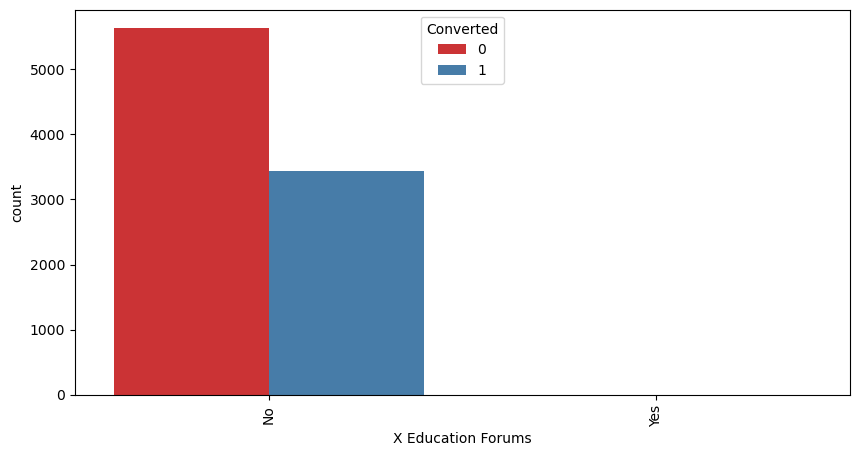

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(x="X Education Forums", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# this parameter has no significance as most parameters having no 

In [88]:
value_counts = lsd1['Newspaper'].astype('category').value_counts()

print(value_counts)

No     9073
Yes       1
Name: Newspaper, dtype: int64


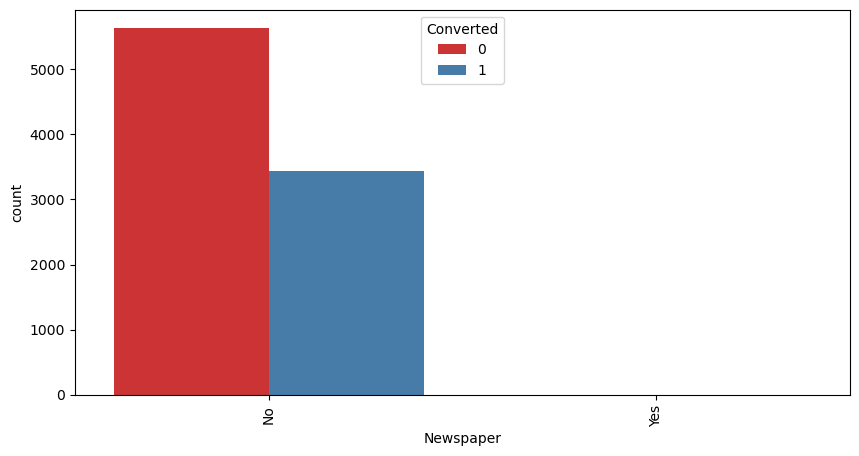

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(x="Newspaper", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# this parameter has no significance as most parameters having no 

In [90]:
value_counts = lsd1['Digital Advertisement'].astype('category').value_counts()

print(value_counts)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64


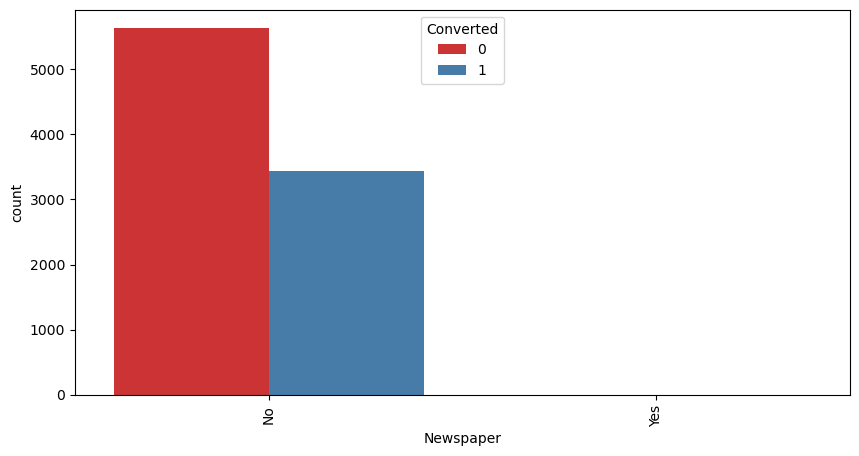

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(x="Newspaper", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# this parameter has no significance as most parameters having no

In [92]:
value_counts = lsd1['Through Recommendations'].astype('category').value_counts()

print(value_counts)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64


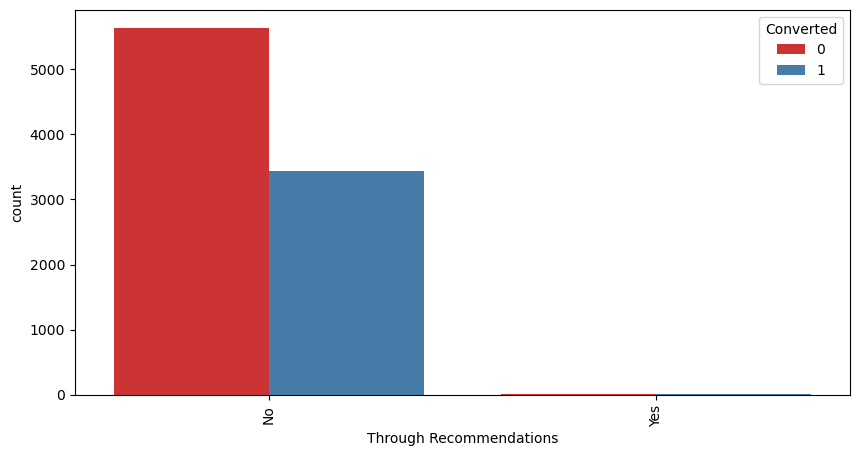

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x="Through Recommendations", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# this parameter has no significance as most parameters having no

In [94]:
value_counts = lsd1['Receive More Updates About Our Courses'].astype('category').value_counts()

print(value_counts)

No    9074
Name: Receive More Updates About Our Courses, dtype: int64


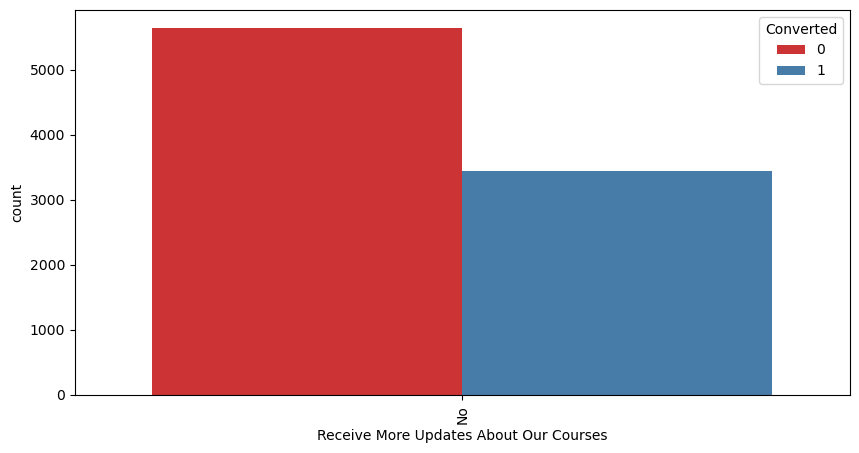

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x="Receive More Updates About Our Courses", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# this parameter has no significance as most parameters having no

In [96]:
value_counts = lsd1['Update me on Supply Chain Content'].astype('category').value_counts()

print(value_counts)

No    9074
Name: Update me on Supply Chain Content, dtype: int64


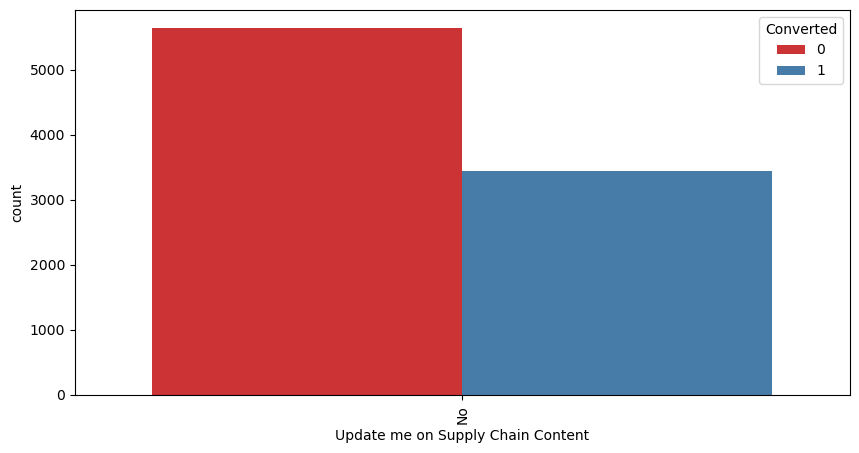

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(x="Update me on Supply Chain Content", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# this parameter has no significance as most parameters having no

In [98]:
value_counts = lsd1['Get updates on DM Content'].astype('category').value_counts()

print(value_counts)

No    9074
Name: Get updates on DM Content, dtype: int64


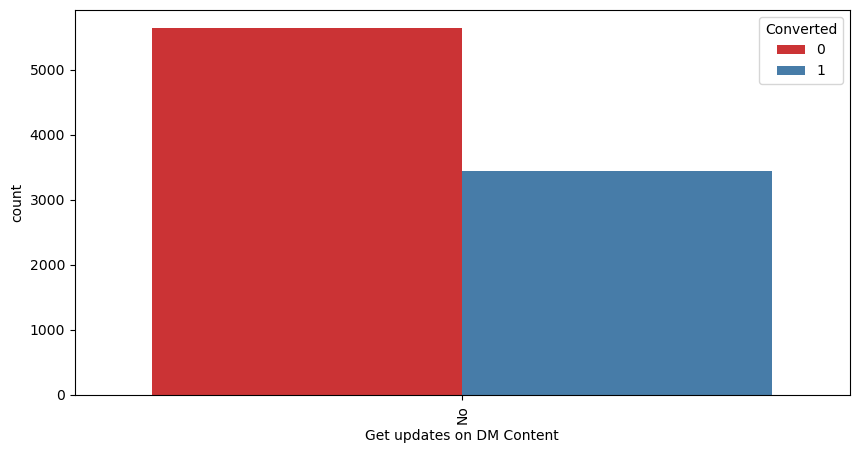

In [99]:
plt.figure(figsize=(10,5))
sns.countplot(x="Get updates on DM Content", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [100]:
# this parameter has no significance as most parameters having no

In [101]:
value_counts = lsd1['I agree to pay the amount through cheque'].astype('category').value_counts()

print(value_counts)

No    9074
Name: I agree to pay the amount through cheque, dtype: int64


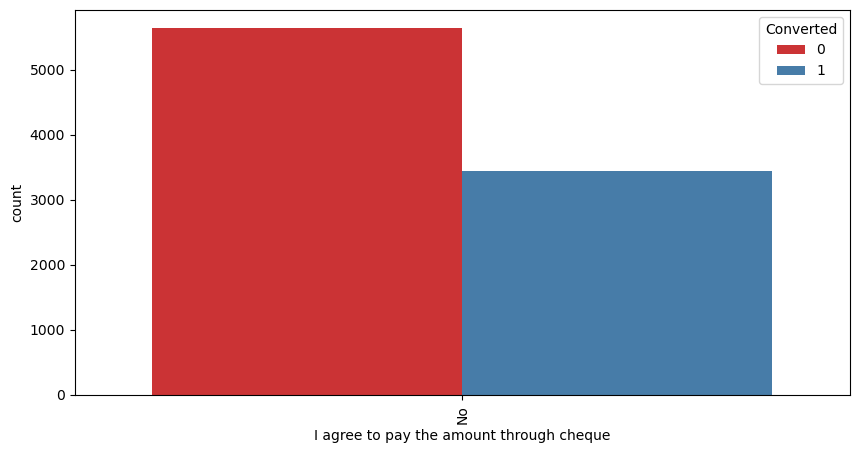

In [102]:
plt.figure(figsize=(10,5))
sns.countplot(x="I agree to pay the amount through cheque", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# this parameter has no significance as most parameters having no

In [103]:
value_counts = lsd1['A free copy of Mastering The Interview'].astype('category').value_counts()

print(value_counts)

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


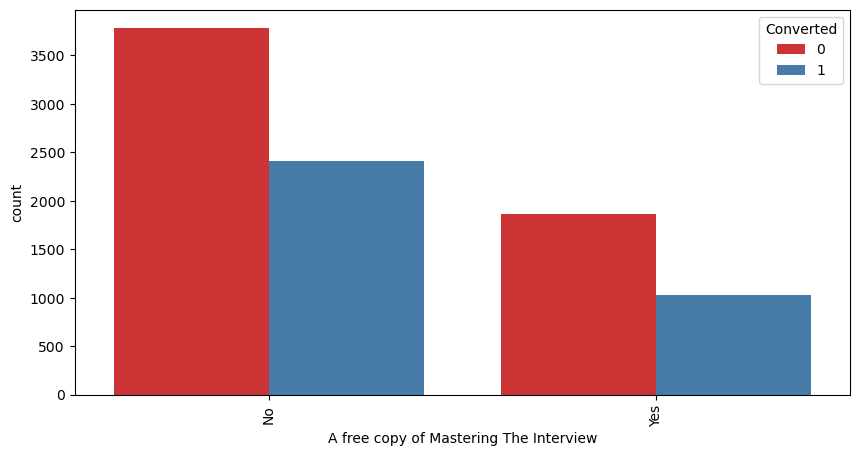

In [104]:
plt.figure(figsize=(10,5))
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# this is also insignificant colums as most values are No

In [105]:
value_counts = lsd1['Last Notable Activity'].astype('category').value_counts()

print(value_counts)

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64


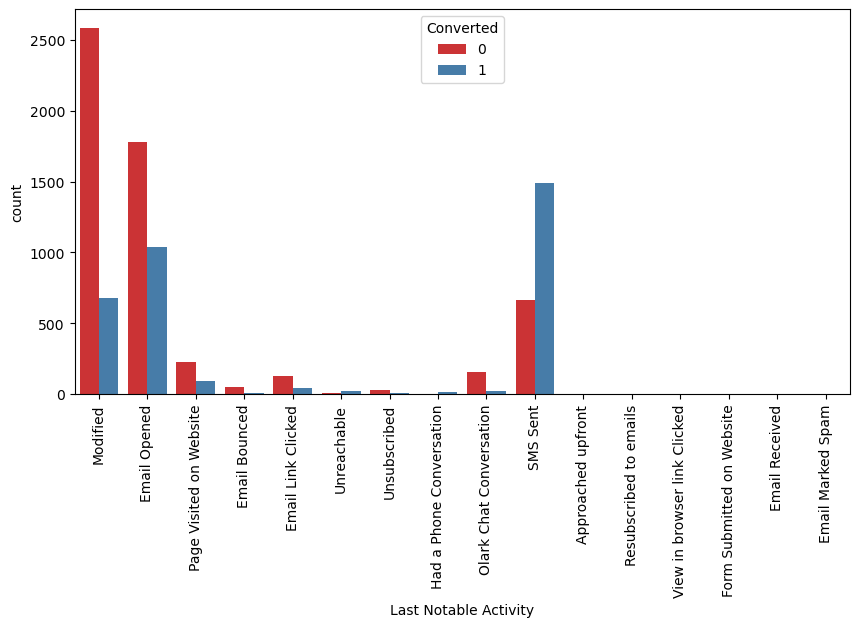

In [106]:
plt.figure(figsize=(10,5))
sns.countplot(x="Last Notable Activity", hue="Converted", data=lsd1, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### Basis above anyalysis we have many columns which are not adding any value to our analysis and we can drop these column without losing any significant information. 

In [107]:
lsd2 = lsd1  # saving data to new variable for droping insignificant columns

In [108]:
lsd2 = lsd2.drop(['Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [109]:
lsd2.shape

(9074, 13)

In [110]:
lsd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Specialization                                 9074 

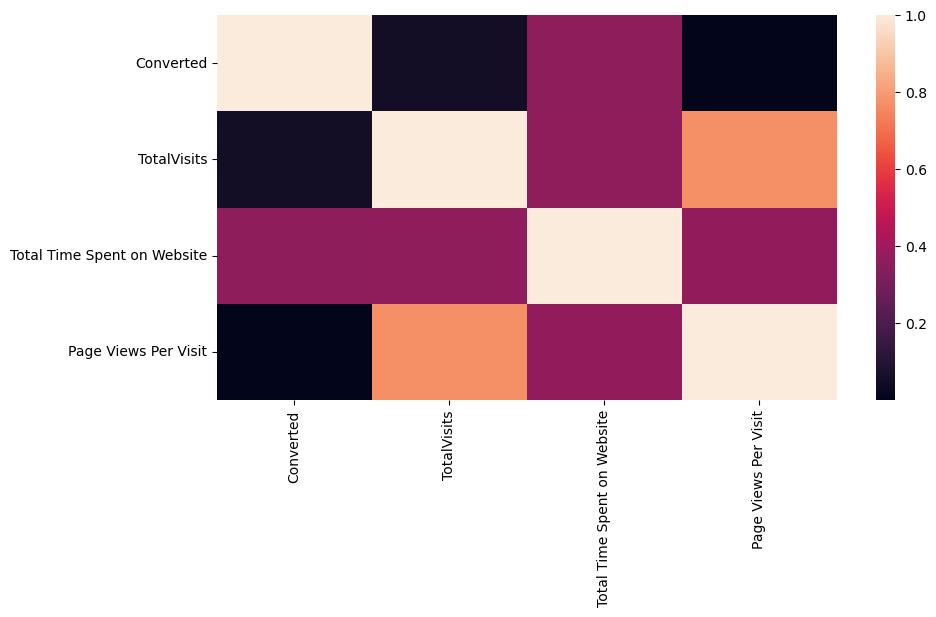

In [111]:
# checking correlation between parameters
plt.figure(figsize=(10,5))
sns.heatmap(lsd2.corr())
plt.show()

In [112]:
lsd2.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

## 5 Creating Dummy Variables 

In [113]:
lsd2_dummy = pd.get_dummies(lsd2[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity']] ,drop_first = True)

In [114]:
lsd2_dummy.shape

(9074, 66)

In [115]:
lsd2_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 66 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Converted                                                                9074 non-null   int64  
 1   TotalVisits                                                              9074 non-null   float64
 2   Total Time Spent on Website                                              9074 non-null   int64  
 3   Page Views Per Visit                                                     9074 non-null   float64
 4   Lead Origin_Landing Page Submission                                      9074 non-null   uint8  
 5   Lead Origin_Lead Add Form                                                9074 non-null   uint8  
 6   Lead Origin_Lead Import                                                 

In [116]:
lsd2_dummy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [117]:
lsd2_dummy = lsd2_dummy.drop(['Converted','Total Time Spent on Website'], 1)

In [118]:
lsd2_dummy.head()

,TotalVisits,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,2.5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1.0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [119]:
lsd2_dummy_concat = pd.concat([lsd2, lsd2_dummy],axis = 1 )

In [120]:
lsd2_dummy_concat

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,no data,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,no data,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,others,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,no data,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,others,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [121]:
lsd2_dummy_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 77 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Origin                                                              9074 non-null   object 
 1   Lead Source                                                              9074 non-null   object 
 2   Do Not Email                                                             9074 non-null   object 
 3   Do Not Call                                                              9074 non-null   object 
 4   Converted                                                                9074 non-null   int64  
 5   TotalVisits                                                              9074 non-null   float64
 6   Total Time Spent on Website                                             

### Delete the columns where we have created dummy variables

In [122]:
lsd2_dummy_concat.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_others',
       'Do Not Email_Yes', 'Do Not Call_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS

In [123]:
lsd2_dummy_concat =  lsd2_dummy_concat.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization',
       'What is your current occupation','What matters most to you in choosing a course'] , axis = 1)

In [124]:
lsd2_dummy_concat = lsd2_dummy_concat.drop(['Last Notable Activity'], axis = 1)

In [125]:
lsd2_dummy_concat

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,TotalVisits,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0.0,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,5.0,2.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,2.0,2.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1.0,1.00,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,2.0,1.00,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,8.0,2.67,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,2.0,2.00,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,2.0,2.00,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,3.0,3.00,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#### All the data cleaned and prepared for model building 

## 6. Train Test  split

In [126]:
# Import required libraries for data nalysis and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [127]:
# Target variable removed from variables to be plotted at x 
X = lsd2_dummy_concat.drop(['Converted'],1)


In [128]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,TotalVisits,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0.0,0.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,5.0,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1.0,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,2.0,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [129]:
y = lsd2_dummy_concat['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [130]:
# split data in train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [131]:
# fit numeric columns total visits , Total time spent on website and page views per visit
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [132]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,TotalVisits,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3563,0.2,0.308979,0.333333,0.2,0.333333,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
273,0.5,0.129401,0.416667,0.5,0.416667,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1903,0.2,0.041373,0.333333,0.2,0.333333,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4982,0.3,0.780810,0.500000,0.3,0.500000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3213,0.3,0.132042,0.500000,0.3,0.500000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


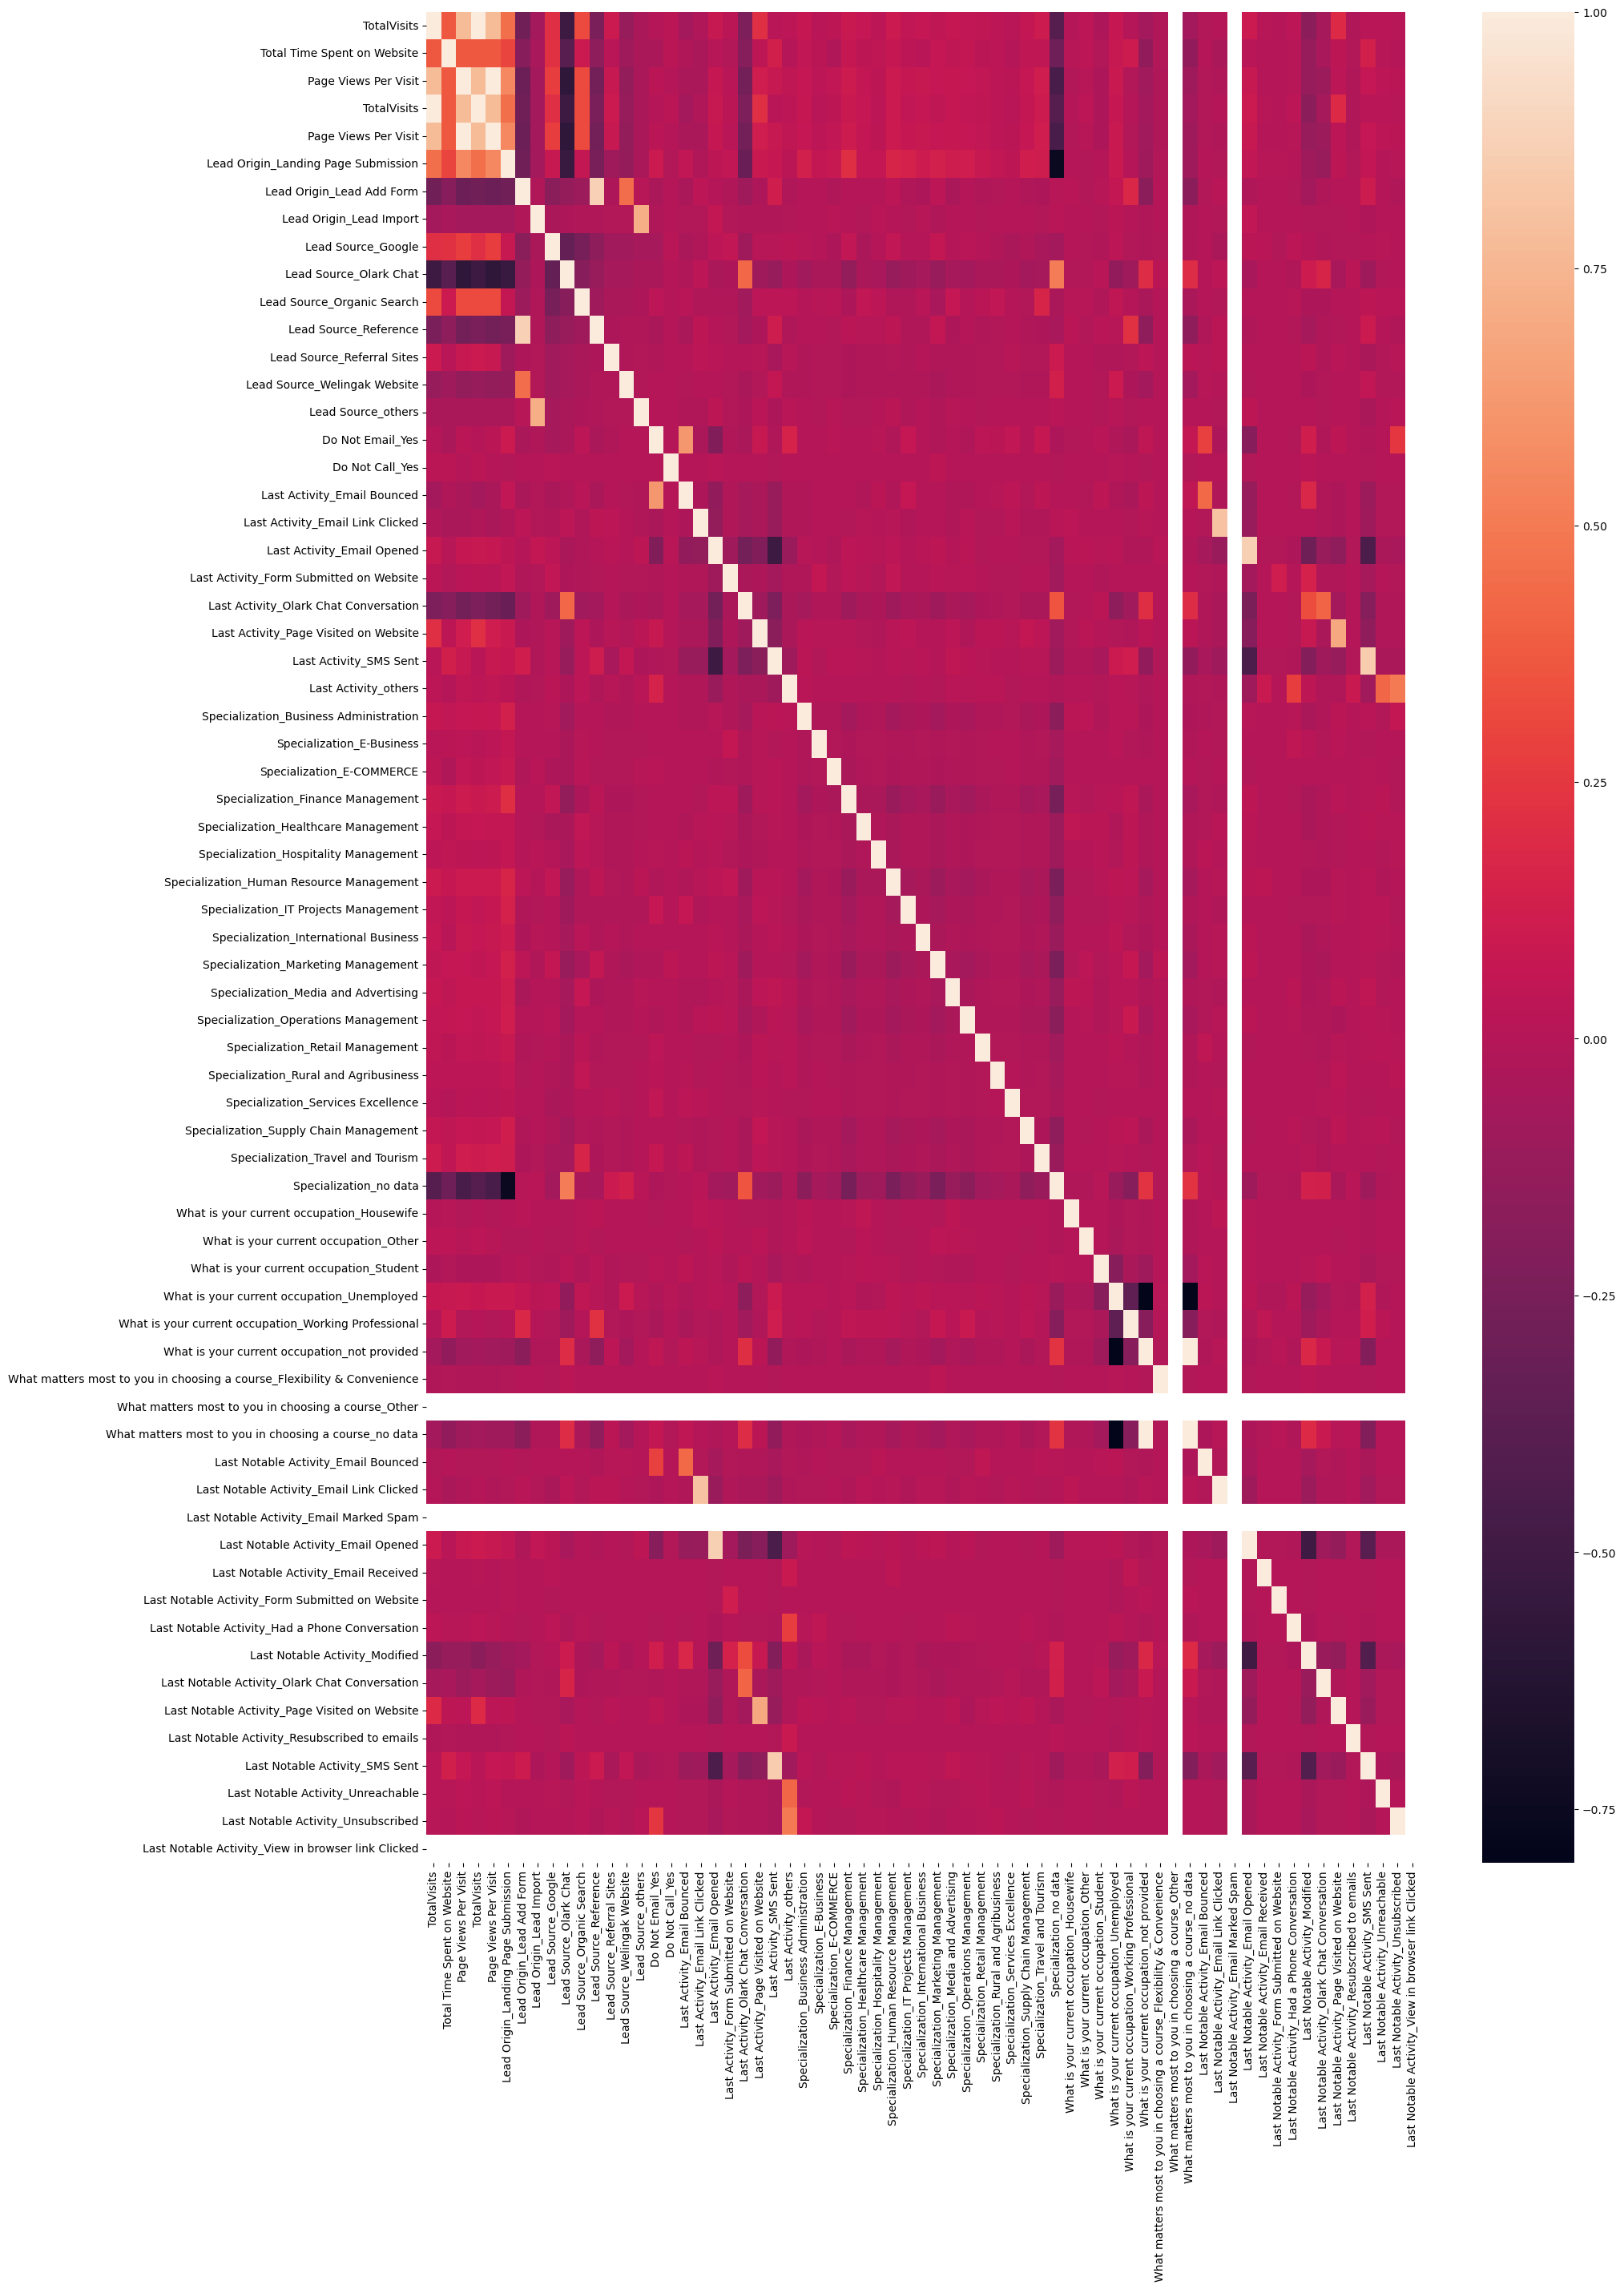

In [133]:
# we will check the correlation between variables using heat map
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

### We have high volume  of variables and using RFE is good option for variable selction 

In [134]:
# required libraries imported and starting RFE selection 

logreg = LogisticRegression()


In [135]:

rfe = RFE(estimator=logreg, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [136]:
# checking features selected by RFE 

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('TotalVisits', False, 4),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_others', False, 26),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 40),
 ('Last Activity_Email Bounced', False, 33),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Page Visited on Website', False, 37),
 ('Last Activity_SMS Sent', True, 1),
 ('Las

In [137]:
# extracting columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_SMS Sent', 'Last Activity_others',
       'Specialization_no data', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_no data',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified'],
      dtype='object')

## 7 Model Building 

In [138]:
# we will start model building and importing required libraries 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [139]:
X_train = X_train[cols]

###  REG model 1

In [140]:
X_train_sm = sm.add_constant(X_train)
regmodel1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = regmodel1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.9
Date:                Mon, 17 Apr 2023   Deviance:                       5163.8
Time:                        23:38:46   Pearson chi2:                 6.31e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4012
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.0273      0.138     -7.432      0.000      -1.298      -0.756
Total Time Spent on Website                               4.4715      0.172     26.058      0.000       4.135       4.808
Lead Origin_Landing Page Submission                      -1.0130      0.130     -7.772      0.000      -1.268      -0.758
Lead Origin_Lead Add Form                                 1.5393      0.903      1.705      0.088      -0.230       3.309
Lead Source_Olark Chat                                    1.1108      0.121      9.209      0.000       0.874       1.347
Lead Source_Reference                                     1.7565      0.927      1.896      0.058      -0.060       3.573
Lead Source_Welingak Website                              4.5904      1.355      3.387      0.001       1.934       7.247
Do Not Email_Yes                                         -1.3386      0.178     -7.518      0.000      -1.688      -0.990
Last Activity_SMS Sent                                    1.3344      0.075     17.709      0.000       1.187       1.482
Last Activity_others                                      1.0954      0.263      4.161      0.000       0.579       1.611
Specialization_no data                                   -0.9557      0.126     -7.567      0.000      -1.203      -0.708
What is your current occupation_Housewife                22.6626   2.05e+04      0.001      0.999   -4.02e+04    4.03e+04
What is your current occupation_Working Professional      2.3196      0.182     12.773      0.000       1.964       2.676
What matters most to you in choosing a course_no data    -1.1143      0.088    -12.632      0.000      -1.287      -0.941
Last Notable Activity_Had a Phone Conversation           21.9729   1.41e+04      0.002      0.999   -2.76e+04    2.77e+04
Last Notable Activity_Modified                           -0.8809      0.080    -11.021      0.000      -1.038      -0.724
=========================================================================================================================
"""

#### here P values are very high in "Last Notable Activity_Had a Phone Conversation" and "What is your current occupation_Housewife"  we will analyze using VIF

In [141]:
# analysing data suing VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,52.08
4,Lead Source_Reference,41.23
5,Lead Source_Welingak Website,12.09
9,Specialization_no data,2.52
1,Lead Origin_Landing Page Submission,2.43
0,Total Time Spent on Website,1.99
3,Lead Source_Olark Chat,1.83
12,What matters most to you in choosing a course_...,1.64
14,Last Notable Activity_Modified,1.64
7,Last Activity_SMS Sent,1.55


In [142]:
# Last Notable Activity_Had a Phone Conversation has very high p value so dropping the column
regcols = cols.drop(['Last Notable Activity_Had a Phone Conversation'], 1)
regcols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_SMS Sent', 'Last Activity_others',
       'Specialization_no data', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_no data',
       'Last Notable Activity_Modified'],
      dtype='object')

## REG model 2

In [143]:
X_train_sm = sm.add_constant(X_train[regcols])
regmodel2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = regmodel2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.8
Date:                Mon, 17 Apr 2023   Deviance:                       5171.6
Time:                        23:39:15   Pearson chi2:                 6.32e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4005
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.0162      0.138     -7.370      0.000      -1.286      -0.746
Total Time Spent on Website                               4.4676      0.171     26.051      0.000       4.131       4.804
Lead Origin_Landing Page Submission                      -1.0179      0.130     -7.828      0.000      -1.273      -0.763
Lead Origin_Lead Add Form                                 1.5327      0.903      1.698      0.090      -0.237       3.302
Lead Source_Olark Chat                                    1.1081      0.121      9.190      0.000       0.872       1.344
Lead Source_Reference                                     1.7600      0.927      1.899      0.058      -0.056       3.576
Lead Source_Welingak Website                              4.6016      1.355      3.395      0.001       1.945       7.258
Do Not Email_Yes                                         -1.3639      0.178     -7.658      0.000      -1.713      -1.015
Last Activity_SMS Sent                                    1.3341      0.075     17.699      0.000       1.186       1.482
Last Activity_others                                      1.2740      0.246      5.171      0.000       0.791       1.757
Specialization_no data                                   -0.9636      0.126     -7.640      0.000      -1.211      -0.716
What is your current occupation_Housewife                21.6622   1.24e+04      0.002      0.999   -2.44e+04    2.44e+04
What is your current occupation_Working Professional      2.3168      0.182     12.758      0.000       1.961       2.673
What matters most to you in choosing a course_no data    -1.1169      0.088    -12.662      0.000      -1.290      -0.944
Last Notable Activity_Modified                           -0.8900      0.080    -11.143      0.000      -1.047      -0.733
=========================================================================================================================
"""

In [144]:
vif = pd.DataFrame()
vif['Features'] = X_train[regcols].columns
vif['VIF'] = [variance_inflation_factor(X_train[regcols].values, i) for i in range(X_train[regcols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,52.08
4,Lead Source_Reference,41.23
5,Lead Source_Welingak Website,12.09
9,Specialization_no data,2.52
1,Lead Origin_Landing Page Submission,2.43
0,Total Time Spent on Website,1.99
3,Lead Source_Olark Chat,1.83
12,What matters most to you in choosing a course_...,1.64
13,Last Notable Activity_Modified,1.64
7,Last Activity_SMS Sent,1.55


In [145]:
# What is your current occupation_Housewife is having high p value so dropping this column
regcols = regcols.drop(['What is your current occupation_Housewife'],1)
regcols


Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_SMS Sent', 'Last Activity_others',
       'Specialization_no data',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_no data',
       'Last Notable Activity_Modified'],
      dtype='object')

## REG model 3

In [146]:
# again making model after droping What is your current occupation_Housewife
X_train_sm = sm.add_constant(X_train[regcols])
regmodel3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = regmodel3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.6
Date:                Mon, 17 Apr 2023   Deviance:                       5177.3
Time:                        23:40:16   Pearson chi2:                 6.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3999
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.0134      0.138     -7.356      0.000      -1.283      -0.743
Total Time Spent on Website                               4.4694      0.171     26.068      0.000       4.133       4.805
Lead Origin_Landing Page Submission                      -1.0168      0.130     -7.828      0.000      -1.271      -0.762
Lead Origin_Lead Add Form                                 1.5302      0.903      1.695      0.090      -0.239       3.299
Lead Source_Olark Chat                                    1.1080      0.121      9.190      0.000       0.872       1.344
Lead Source_Reference                                     1.7659      0.927      1.906      0.057      -0.050       3.582
Lead Source_Welingak Website                              4.6038      1.355      3.397      0.001       1.948       7.260
Do Not Email_Yes                                         -1.3656      0.178     -7.669      0.000      -1.715      -1.017
Last Activity_SMS Sent                                    1.3310      0.075     17.665      0.000       1.183       1.479
Last Activity_others                                      1.2707      0.246      5.158      0.000       0.788       1.754
Specialization_no data                                   -0.9655      0.126     -7.660      0.000      -1.213      -0.718
What is your current occupation_Working Professional      2.3131      0.182     12.739      0.000       1.957       2.669
What matters most to you in choosing a course_no data    -1.1192      0.088    -12.691      0.000      -1.292      -0.946
Last Notable Activity_Modified                           -0.8877      0.080    -11.124      0.000      -1.044      -0.731
=========================================================================================================================
"""

In [147]:
vif = pd.DataFrame()
vif['Features'] = X_train[regcols].columns
vif['VIF'] = [variance_inflation_factor(X_train[regcols].values, i) for i in range(X_train[regcols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,52.08
4,Lead Source_Reference,41.22
5,Lead Source_Welingak Website,12.09
9,Specialization_no data,2.52
1,Lead Origin_Landing Page Submission,2.43
0,Total Time Spent on Website,1.99
3,Lead Source_Olark Chat,1.83
11,What matters most to you in choosing a course_...,1.64
12,Last Notable Activity_Modified,1.64
7,Last Activity_SMS Sent,1.55


In [148]:
# after building model 3 still we have high VIF values for Lead Origin_Lead Add Form so we are dropping this column
regcols = regcols.drop(['Lead Origin_Lead Add Form'],1)
regcols



Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_SMS Sent', 'Last Activity_others',
       'Specialization_no data',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_no data',
       'Last Notable Activity_Modified'],
      dtype='object')

## REG model 4

In [149]:
# again making model after droping Lead Origin_Lead Add Form
X_train_sm = sm.add_constant(X_train[regcols])
regmodel4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = regmodel4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Mon, 17 Apr 2023   Deviance:                       5180.5
Time:                        23:40:56   Pearson chi2:                 6.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3996
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.9854      0.137     -7.202      0.000      -1.254      -0.717
Total Time Spent on Website                               4.4615      0.171     26.062      0.000       4.126       4.797
Lead Origin_Landing Page Submission                      -1.0405      0.129     -8.046      0.000      -1.294      -0.787
Lead Source_Olark Chat                                    1.0998      0.120      9.142      0.000       0.864       1.336
Lead Source_Reference                                     3.2778      0.249     13.141      0.000       2.789       3.767
Lead Source_Welingak Website                              6.1247      1.016      6.029      0.000       4.134       8.116
Do Not Email_Yes                                         -1.3669      0.178     -7.676      0.000      -1.716      -1.018
Last Activity_SMS Sent                                    1.3296      0.075     17.649      0.000       1.182       1.477
Last Activity_others                                      1.2673      0.246      5.142      0.000       0.784       1.750
Specialization_no data                                   -0.9836      0.126     -7.826      0.000      -1.230      -0.737
What is your current occupation_Working Professional      2.3086      0.182     12.710      0.000       1.953       2.665
What matters most to you in choosing a course_no data    -1.1213      0.088    -12.721      0.000      -1.294      -0.949
Last Notable Activity_Modified                           -0.8892      0.080    -11.146      0.000      -1.046      -0.733
=========================================================================================================================
"""

In [150]:
vif = pd.DataFrame()
vif['Features'] = X_train[regcols].columns
vif['VIF'] = [variance_inflation_factor(X_train[regcols].values, i) for i in range(X_train[regcols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_no data,2.52
1,Lead Origin_Landing Page Submission,2.43
0,Total Time Spent on Website,1.99
2,Lead Source_Olark Chat,1.83
10,What matters most to you in choosing a course_...,1.64
11,Last Notable Activity_Modified,1.64
6,Last Activity_SMS Sent,1.55
9,What is your current occupation_Working Profes...,1.20
3,Lead Source_Reference,1.16
5,Do Not Email_Yes,1.14


In [207]:
regcols = regcols.drop(['Specialization_no data'],1)
regcols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_SMS Sent', 'Last Activity_others',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_no data',
       'Last Notable Activity_Modified'],
      dtype='object')

## REG model 5

In [250]:
# again making model after droping Lead Origin_Lead Add Form
X_train_sm = sm.add_constant(X_train[regcols])
regmodel5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = regmodel5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.6
Date:                Tue, 18 Apr 2023   Deviance:                       5243.3
Time:                        06:18:21   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3937
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.7256      0.100    -17.323      0.000      -1.921      -1.530
Total Time Spent on Website                               4.5588      0.171     26.701      0.000       4.224       4.893
Lead Origin_Landing Page Submission                      -0.3221      0.089     -3.609      0.000      -0.497      -0.147
Lead Source_Olark Chat                                    1.0562      0.117      8.994      0.000       0.826       1.286
Lead Source_Reference                                     3.6433      0.245     14.878      0.000       3.163       4.123
Lead Source_Welingak Website                              5.9595      1.015      5.874      0.000       3.971       7.948
Do Not Email_Yes                                         -1.3794      0.177     -7.795      0.000      -1.726      -1.033
Last Activity_SMS Sent                                    1.3025      0.075     17.373      0.000       1.156       1.449
Last Activity_others                                      1.2598      0.243      5.192      0.000       0.784       1.735
What is your current occupation_Working Professional      2.4272      0.177     13.697      0.000       2.080       2.774
What matters most to you in choosing a course_no data    -1.2182      0.087    -13.998      0.000      -1.389      -1.048
Last Notable Activity_Modified                           -0.8972      0.079    -11.360      0.000      -1.052      -0.742
=========================================================================================================================
"""

In [251]:
vif = pd.DataFrame()
vif['Features'] = X_train[regcols].columns
vif['VIF'] = [variance_inflation_factor(X_train[regcols].values, i) for i in range(X_train[regcols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.13
0,Total Time Spent on Website,1.84
10,Last Notable Activity_Modified,1.52
6,Last Activity_SMS Sent,1.50
9,What matters most to you in choosing a course_...,1.49
2,Lead Source_Olark Chat,1.35
8,What is your current occupation_Working Profes...,1.19
3,Lead Source_Reference,1.15
5,Do Not Email_Yes,1.14
7,Last Activity_others,1.05


##### Now p values are all zero and VIF values are also below 5 so we finalized REg model 5 as final model

## 7 Making predictions 

In [252]:
# we have trained the model now we are predicting values using model built
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3563    0.660033
273     0.188816
1903    0.176981
4982    0.862240
3213    0.261083
7029    0.119257
6579    0.734111
1384    0.063451
6440    0.638280
2369    0.058156
dtype: float64

In [253]:
# reshaping into array 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.66003348, 0.18881558, 0.17698091, 0.86223999, 0.26108319,
       0.11925692, 0.73411092, 0.06345072, 0.63827957, 0.05815578])

In [254]:
# Checking the values with actual conversions and conversion predictions
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.660033
1,0,0.188816
2,0,0.176981
3,1,0.862240
4,0,0.261083


In [255]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.660033,1
1,0,0.188816,0
2,0,0.176981,0
3,1,0.862240,1
4,0,0.261083,0


#### model is prediction all the values correctly and now we will go for model evaluation 

## 8 Model Evaluation 

In [256]:
# importing required libraries for model evaluation 
from sklearn import metrics

In [257]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3528,  424],
       [ 775, 1624]], dtype=int64)

In [258]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [259]:
# sensitivity checking logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.676948728636932


In [260]:
#  calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8927125506072875


In [261]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.10728744939271255


In [262]:
# Calculating Positive predictive value - predicting converted lead when the lead was actually positive
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.79296875


In [263]:
# calculating Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8198930978387172


##  9 Precision and recall

In [264]:
# confusion matrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3528,  424],
       [ 775, 1624]], dtype=int64)

In [265]:
# calculating Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.79296875


In [266]:
# calculating Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.676948728636932


## 10 precision and recall trade off

In [227]:
from sklearn.metrics import precision_recall_curve



In [267]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6346    1
 6347    0
 6348    0
 6349    1
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [268]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

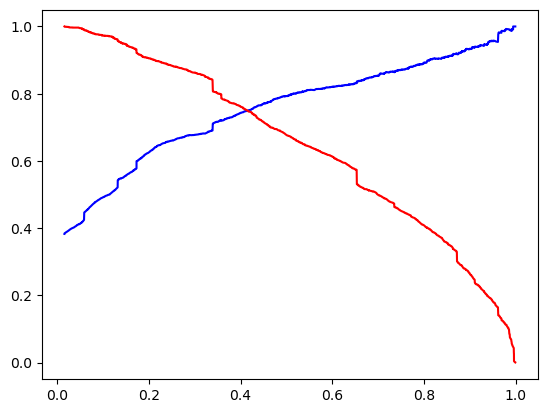

In [269]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 10 Prediction on test set

In [270]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,final_predicted
0,1,0.660033,1,1
1,0,0.188816,0,0
2,0,0.176981,0,0
3,1,0.862240,1,1
4,0,0.261083,0,0


In [271]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[regcols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Last Activity_others,What is your current occupation_Working Professional,What matters most to you in choosing a course_no data,Last Notable Activity_Modified
4870,0.000000,0,1,0,0,0,0,0,0,0,0
3315,0.660211,1,0,0,0,0,0,0,0,0,0
5166,0.000000,0,1,0,0,0,0,0,0,1,0
5210,0.600352,1,0,0,0,0,1,0,0,0,0
8447,0.055898,1,0,0,0,0,0,0,0,0,0


In [272]:
# Adding a const
X_test_sm = sm.add_constant(X_test)



In [273]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)


In [274]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [275]:
y_pred_1.head()

,0
4870,0.338635
3315,0.723550
5166,0.131524
5210,0.879929
8447,0.142728


In [276]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [277]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [278]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [279]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [280]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4870,0.338635
1,1,3315,0.723550
2,0,5166,0.131524
3,1,5210,0.879929
4,0,8447,0.142728


In [281]:
y_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Prospect ID,0,final_predicted
0,0,4870,0.338635,1
1,1,3315,0.723550,0
2,0,5166,0.131524,0
3,1,5210,0.879929,1
4,0,8447,0.142728,0
...,...,...,...,...
2718,0,8200,0.628905,0
2719,0,6943,0.758548,1
2720,0,5841,0.172708,0
2721,0,8145,0.394579,0


In [283]:
# Calculating the overall accuracy on test set 
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5159750275431509

In [285]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[965, 722],
       [596, 440]], dtype=int64)

In [286]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [291]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.4247104247104247

In [292]:
# calculating Precision 
TP / (TP + FP)


0.37865748709122204

In [293]:
#calculating Recall
TP / (TP + FN)

0.4247104247104247